# Implementing Classification Methods
Different classification methods using sklearn module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Loading the Wine Dataset
Classification task with 13 features and 3 classes.

In [2]:
data = load_wine()

X = data.data
y = data.target

df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['Quality'])

df = pd.concat((df_X, df_y), axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Splitting the data
Spliting the data into train and test

In [3]:
X = df.drop('Quality', axis=1).values
y = df['Quality'].values

org_train_x, org_test_x, train_y, test_y = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)

print('train_x:', org_train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', org_test_x.shape)
print('test_y:', test_y.shape)

train_x: (142, 13)
train_y: (142,)
test_x: (36, 13)
test_y: (36,)


### Scaling the data
z = (x - mean) / std

In [4]:
scaler = StandardScaler()
scaler.fit(org_train_x)

with open('z_scaler_wine.save', 'wb') as f:
    pickle.dump(scaler, f)

with open('z_scaler_wine.save', 'rb') as f:
    scaler = pickle.load(f)

scaled_train_x = scaler.transform(org_train_x)
scaled_test_x = scaler.transform(org_test_x)

print('Std of train_x:', org_train_x.std())
print('Std of scaled_train_x:', scaled_train_x.std())
print('Mean of train_x:', org_train_x.mean())
print('Mean of scaled train_x:', scaled_train_x.mean())
print('\nStd of test_x:', org_test_x.std())
print('Std of scaled_test_x:', scaled_test_x.std())
print('Mean of test_x:', org_test_x.mean())
print('Mean of scaled_test_x:', scaled_test_x.mean())

Std of train_x: 211.437979334
Std of scaled_train_x: 1.0
Mean of train_x: 68.2614442037
Mean of scaled train_x: 1.13379872482e-15

Std of test_x: 231.9287923
Std of scaled_test_x: 0.933612830824
Mean of test_x: 72.5740811944
Mean of scaled_test_x: 0.00077874404233


### Principal Component Analysis
Plotting the full variance plot first, then reducing dimensions.

[ 0.35900066  0.18691934  0.11606557  0.07371716  0.0665386   0.04854582
  0.04195042  0.02683922  0.0234746   0.01889734  0.01715943  0.01262928
  0.00826257]


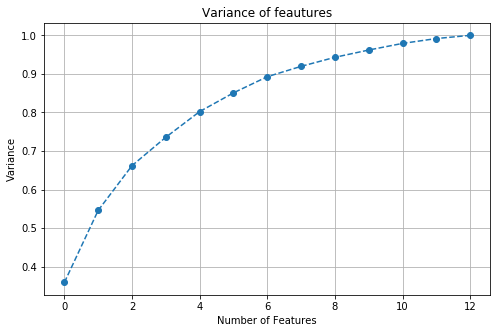

In [5]:
pca = PCA(n_components=13)  # 13 features
pca.fit(scaled_train_x)

print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.title('Variance of feautures')
plt.xlabel('Number of Features')
plt.ylabel('Variance')
plt.grid()

In [6]:
pca = PCA(n_components=6)
pca.fit(scaled_train_x)

with open('pca_wine.save', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca_wine.save', 'rb') as f:
    scaler = pickle.load(f)

train_x = pca.transform(scaled_train_x)
test_x = pca.transform(scaled_test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(142, 6)
(142,)
(36, 6)
(36,)


### Data preprocessed:
1. Split the data into training and testing datasets.
2. Scaled the data by fitting Standard Scaler (z-score) on train_x, and transforming both train_x and test_x.
3. Principal Component Analysis, fit on train_x and transform both train_x and test_x, reduced dimensions from 13 to 6.

### Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 100.0 | MSE: 0.0


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Classification Report for test data. 

Precision = True Positive / (True Positive + False Positive)  
Model says 10 people have cancer, reality only 9.

Recall = True Positive / (True Positive + False Negative) aka TPR aka Accuracy  
Model says 9 people have cancer, reality 10!

f1-score is the harmonic mean of precision and recall.

Support is the number of samples that lie per class.

In [8]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### Confusion Matrix for test data.
X axis is the target class, and y axis is the predicted class

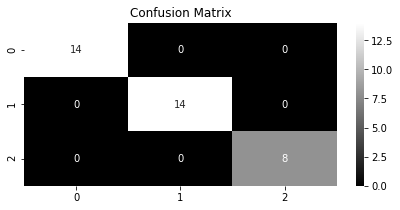

In [9]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Linear Discriminant Analysis

In [10]:
model = LinearDiscriminantAnalysis()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 97.22222222222221 | MSE: 0.027777777777777776


In [11]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



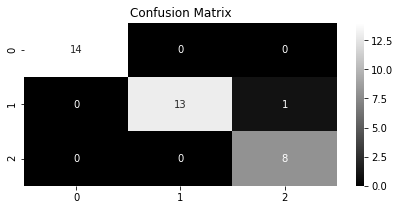

In [12]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### K Neighbors Classifier

In [13]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 97.22222222222221 | MSE: 0.027777777777777776


In [14]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



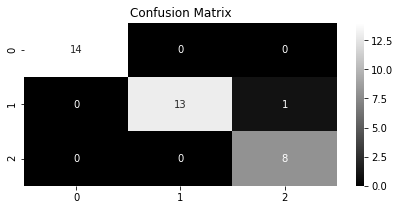

In [15]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Support Vector Classifier

#### Grid Search CV
We first create a dictionary of all the options for different hyperparameters, then pass it to the algorithm.

In [16]:
model = SVC(gamma='auto')

param = {'kernel': ['linear', 'poly', 'rbf'],
         'degree': [3, 5]}

gs = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=3)

In [17]:
gs.fit(train_x, train_y)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'degree': [3, 5], 'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [18]:
gs.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [19]:
gs.best_score_

0.96478873239436624

#### Using the parameters suggested by GridSearchCV

In [20]:
model = SVC(kernel='rbf')
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 100.0 | MSE: 0.0


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



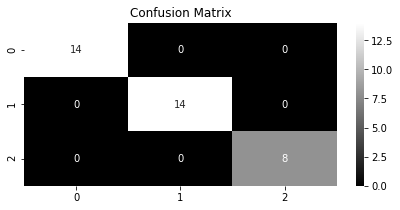

In [22]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Naive Bayes

In [23]:
model = GaussianNB()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 100.0 | MSE: 0.0


In [24]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



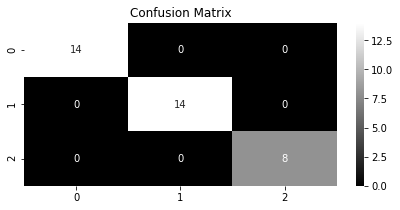

In [25]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Decision Tree
Will most likely overfit training data, since max depth is not restricted.

In [26]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 100.0 | MSE: 0.0


In [27]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



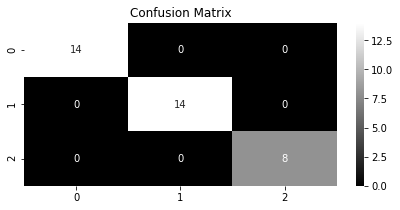

In [28]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Random Forest
Many decision trees given different datasets, and average of them is 
returned. Uses bootstrapping and bagging.

In [29]:
model = LinearDiscriminantAnalysis()
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 97.22222222222221 | MSE: 0.027777777777777776


In [30]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



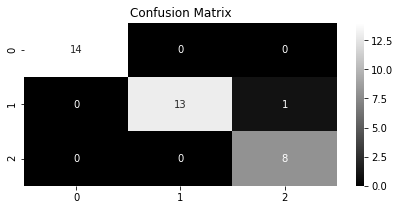

In [31]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Multi Layer Perceptron
aka Neural Network, works best when features are in range of 0 and 1.

#### Scaling data using MinMaxScaler

In [32]:
scaler = MinMaxScaler()
minmax_train_x = scaler.fit_transform(train_x)
minmax_test_x = scaler.transform(test_x)

print(minmax_train_x.min())
print(minmax_train_x.max())
print(minmax_test_x.min())
print(minmax_test_x.max())

0.0
1.0
-0.0833620938591
0.90936147004


In [33]:
model = MLPClassifier(hidden_layer_sizes=(64, 128, 256),
                      activation='relu',
                      solver='adam',
                      learning_rate_init=0.001,
                      max_iter=1000,
                      random_state=42,
                      shuffle=True,
                      early_stopping=True)

model.fit(minmax_train_x, train_y)

pred = model.predict(minmax_test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(minmax_test_x, test_y)

print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 86.11111111111111 | MSE: 0.1388888888888889


In [34]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.74      1.00      0.85        14
           2       1.00      0.38      0.55         8

    accuracy                           0.86        36
   macro avg       0.91      0.79      0.80        36
weighted avg       0.90      0.86      0.84        36



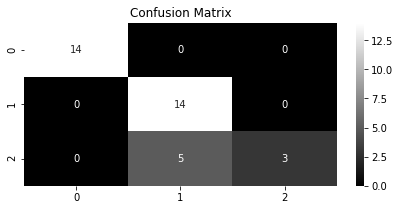

In [35]:
cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

Printing out various attributes of the network.

In [36]:
print('Class labels:', model.classes_)
print('Loss:', model.loss_)
print('Number of iterations:', model.n_iter_)
print('Number of layers:', model.n_layers_)
print('Number of neurons in output layer:', model.n_outputs_)
print('Activation function used in output layer:', model.out_activation_)

Class labels: [0 1 2]
Loss: 0.52831120907
Number of iterations: 30
Number of layers: 5
Number of neurons in output layer: 3
Activation function used in output layer: softmax
